In [3]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models.segmentation import deeplabv3_resnet50

In [ ]:
# Pre-trained DeepLabV3 model load kar rahe hain
model = deeplabv3_resnet50(pretrained=True)
model.eval()  # Model evaluation mode me set kar rahe hain

In [5]:
# Image ko preprocess karne ke liye transformations define kar rahe hain
transform = T.Compose([
    T.Resize((520, 520)),  # Image ka size resize kar rahe hain
    T.ToTensor(),  # Image ko tensor me convert kar rahe hain
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization apply kar rahe hain
])

In [6]:
# Load input image
image_path = "img8.jpg"  # Change this to your image path
image = Image.open(image_path).convert("RGB") # Image RGB format me convert kar rahe hain
input_tensor = transform(image).unsqueeze(0)# Tensor format me convert kar rahe hain aur batch dimension add kar rahe hain

In [7]:
# Model inference run kar rahe hain
with torch.no_grad():
    output = model(input_tensor)['out'][0] #Generate output

In [8]:
# Process output
output_predictions = output.argmax(0).byte().cpu().numpy() 

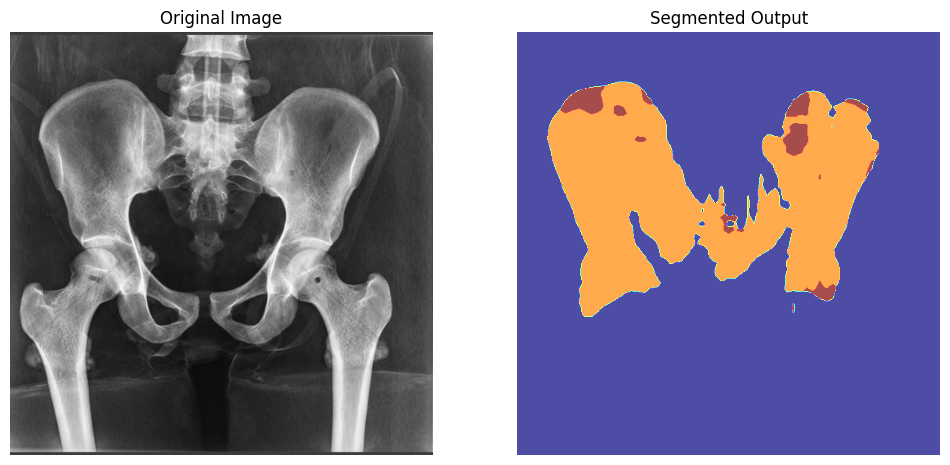

In [9]:
# Display original image and segmented output
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(output_predictions, cmap="jet", alpha=0.7)
ax[1].set_title("Segmented Output")
ax[1].axis("off")

plt.show()